In [13]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
import dataloader
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
dataloader = dataloader.DataLoader(Xtrainpath='./train-images-idx3-ubyte.gz',
                        Ytrainpath='./train-labels-idx1-ubyte.gz',
                        Xtestpath='./t10k-images-idx3-ubyte.gz',
                        Ytestpath='./t10k-labels-idx1-ubyte.gz')
Xtrain, Ytrain, Xtest, Ytest = dataloader.load_data()
tensor_Xtrain = torch.Tensor(Xtrain).view(-1, 1,28,28).float()
tensor_Ytrain = torch.Tensor(Ytrain)
dataset = TensorDataset(tensor_Xtrain, tensor_Ytrain)
train_loader = DataLoader(dataset, batch_size=256, num_workers=0)
tensor_Xtest = torch.Tensor(Xtest).view(-1, 1,28,28).float()
tensor_Ytest = torch.Tensor(Ytest)
test_dataset = TensorDataset(tensor_Xtest, tensor_Ytest)
test_loader = DataLoader(test_dataset, batch_size=1000, num_workers=0)

In [14]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x)

model = Net()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
print(model)

Net(
  (conv1): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2_drop): Dropout2d(p=0.5, inplace=False)
  (fc1): Linear(in_features=320, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=10, bias=True)
)


In [15]:
def evaluation():
  test_loss = 0.0
  class_correct = list(0. for i in range(10))
  class_total = list(0. for i in range(10))
  model.eval()
  for data, target in test_loader:
      output = model(data)
      loss = criterion(output, target.long())
      test_loss += loss.item() * data.size(0)
      _, pred = torch.max(output, 1)
      correct = np.squeeze(pred.eq(target.data.view_as(pred)))
      for i in range(1000):
          label = int(target.data[i])
          class_correct[label] += correct[i].item()
          class_total[label] += 1
  test_loss = test_loss/len(test_loader.dataset)
  accuracy = 100. * np.sum(class_correct) / np.sum(class_total)
  return test_loss, accuracy

def train_accuracy():
  class_correct = list(0. for i in range(10))
  class_total = list(0. for i in range(10))
  model.eval()
  for data, target in train_loader:
      output = model(data)
      _, pred = torch.max(output, 1)
      correct = np.squeeze(pred.eq(target.data.view_as(pred)))
      for i in range(len(target.data)):
          label = int(target.data[i])
          class_correct[label] += correct[i].item()
          class_total[label] += 1
  accuracy = 100. * np.sum(class_correct) / np.sum(class_total)
  return accuracy

In [16]:
n_epoches = 50
training_losses = []
test_losses = []
test_accuracies = []
train_accuracies = []
model.train()
for epoch in range(n_epoches):
    train_loss = 0.0
    for data, target in train_loader:
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target.long())
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * data.size(0)
    train_loss = train_loss / len(train_loader.dataset)
    training_losses.append(train_loss)
    test_loss, test_accuracy = evaluation()
    train_ac = train_accuracy()
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)
    train_accuracies.append(train_ac)
    print('Epoch: {} \tTraining Loss: {:.6f}'.format(
        epoch+1, 
        train_loss
        ))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 1 	Training Loss: 1.390834
Epoch: 2 	Training Loss: 0.139042
Epoch: 3 	Training Loss: 0.085814
Epoch: 4 	Training Loss: 0.067019
Epoch: 5 	Training Loss: 0.056054
Epoch: 6 	Training Loss: 0.048567
Epoch: 7 	Training Loss: 0.043194
Epoch: 8 	Training Loss: 0.038867
Epoch: 9 	Training Loss: 0.035309
Epoch: 10 	Training Loss: 0.032349
Epoch: 11 	Training Loss: 0.029773
Epoch: 12 	Training Loss: 0.027489
Epoch: 13 	Training Loss: 0.025434
Epoch: 14 	Training Loss: 0.023563
Epoch: 15 	Training Loss: 0.021876
Epoch: 16 	Training Loss: 0.020249
Epoch: 17 	Training Loss: 0.018793
Epoch: 18 	Training Loss: 0.017419
Epoch: 19 	Training Loss: 0.016218
Epoch: 20 	Training Loss: 0.015104
Epoch: 21 	Training Loss: 0.014052
Epoch: 22 	Training Loss: 0.013038
Epoch: 23 	Training Loss: 0.012119
Epoch: 24 	Training Loss: 0.011322
Epoch: 25 	Training Loss: 0.010493
Epoch: 26 	Training Loss: 0.009714
Epoch: 27 	Training Loss: 0.009023
Epoch: 28 	Training Loss: 0.008349
Epoch: 29 	Training Loss: 0.0

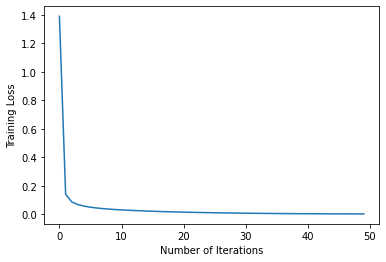

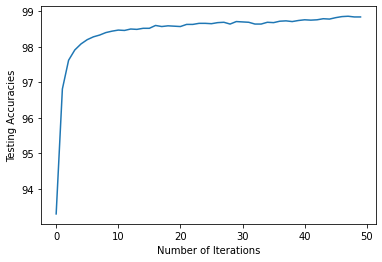

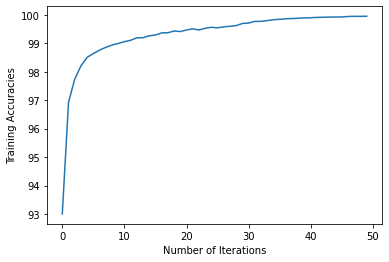

98.4434
0.8115407814768142
99.28726666666667
1.0800633602813416


In [17]:
iters = list(range(50))
plt.plot(iters, training_losses)
plt.xlabel("Number of Iterations")
plt.ylabel("Training Loss")
plt.show()
plt.plot(iters, test_accuracies)
plt.xlabel("Number of Iterations")
plt.ylabel("Testing Accuracies")
plt.show()
plt.plot(iters, train_accuracies)
plt.xlabel("Number of Iterations")
plt.ylabel("Training Accuracies")
plt.show()
print(np.mean(test_accuracies))
print(np.std(test_accuracies))
print(np.mean(train_accuracies))
print(np.std(train_accuracies))

In [18]:
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
model.eval()
for data, target in test_loader:
    output = model(data)
    loss = criterion(output, target.long())
    test_loss += loss.item() * data.size(0)
    _, pred = torch.max(output, 1)
    correct = np.squeeze(pred.eq(target.data.view_as(pred)))
    for i in range(1000):
        label = int(target.data[i])
        class_correct[label] += correct[i].item()
        class_total[label] += 1
test_loss = test_loss/len(test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            str(i), 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Test Loss: 0.048358

Test Accuracy of     0: 99% (975/980)
Test Accuracy of     1: 99% (1128/1135)
Test Accuracy of     2: 98% (1019/1032)
Test Accuracy of     3: 99% (1001/1010)
Test Accuracy of     4: 99% (975/982)
Test Accuracy of     5: 99% (884/892)
Test Accuracy of     6: 98% (945/958)
Test Accuracy of     7: 98% (1013/1028)
Test Accuracy of     8: 98% (956/974)
Test Accuracy of     9: 97% (988/1009)

Test Accuracy (Overall): 98% (9884/10000)
